In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

from scipy.stats import mannwhitneyu, ttest_ind

from shutil import copyfile

In [2]:
if not os.path.exists("../results_figures"):
    os.mkdir("../results_figures")

In [3]:
base_dir = "/data/projects/robin/cell_free/proteomics_WGCNA/processed/"
data = "lfq.csv"
metadata = "metadata.csv"

base_folder = "/data/projects/robin/cell_free/proteomics_WGCNA/"

In [4]:
corrs_path = os.path.join(base_folder, "moduleTraitCor.csv")
pvalue_path = os.path.join(base_folder, "moduleTraitPvalue.csv")
module_genes_path = os.path.join(base_folder, "module_genes.json")
with open(module_genes_path, "r") as f:
    dict_module_genes = json.load(f) 

In [5]:
df_module_cor = pd.read_csv(corrs_path, index_col=0)
df_module_p = pd.read_csv(pvalue_path, index_col=0)
with open(module_genes_path, "r") as f:
    dict_module_genes = json.load(f) 

In [6]:
df_module_cor.rename(columns={"X0": "low", "X1": "high"}, inplace=True)
df_module_p.rename(columns={"X0": "low", "X1": "high"}, inplace=True)
conditions = ["high"]

In [7]:
df_module_p

,low,high
MEdarkorange,0.351224,0.351224
MEdarkturquoise,0.515012,0.515012
MEdarkred,0.428470,0.428470
MElightcyan,0.180299,0.180299
MEroyalblue,0.119622,0.119622
MEyellow,0.318048,0.318048
MEdarkgreen,0.335099,0.335099
MEgrey60,0.208860,0.208860
MEsaddlebrown,0.455589,0.455589
MEwhite,0.215060,0.215060


In [8]:
for condition in conditions:
    cols = [col for col in df_module_cor.columns.tolist() if col==condition]
    df_module_cor_sub = df_module_cor[cols]
    df_module_cor_sub = df_module_cor_sub.sort_values(by="{}".format(condition), ascending=False)
    

In [9]:
df_module_p_sub = df_module_p[df_module_cor_sub.columns]
df_module_p_sub.columns = ["p"]
df_comb = pd.concat([df_module_cor_sub, df_module_p_sub], axis=1)

In [10]:
modules_pos = [module for module in df_comb.index if df_comb.loc[module, conditions[0]]>0]
modules_neg = [module for module in df_comb.index if df_comb.loc[module, conditions[0]]<0]

In [11]:
rem_len = df_module_cor_sub.shape[0]-len(modules_pos + modules_neg)

tick_labels = []
colors = []

for module in df_module_cor_sub.index:
    if module in modules_pos or module in modules_neg:
        colors.append(module.split("ME")[1])
        tick_labels.append(module.split("ME")[1])
    else:
        colors.append("white")
        tick_labels.append("")                                              

In [12]:
for i in range(len(colors)):
    if colors[i]=="grey60":
        colors[i] = "grey"

In [13]:
from adjustText import adjust_text

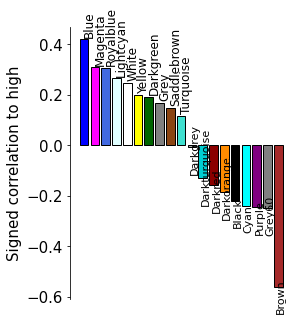

In [14]:
height = df_module_cor_sub.iloc[:,0]

plt.figure(figsize=(4, 5))
plt.bar(df_module_cor_sub.index, height=height, align='edge', color=colors, edgecolor="black")
plt.xticks("")

# texts = []

for module in modules_pos:
    x = np.where(df_module_cor_sub.index==module)[0][0]+0.3

    y = 0.02 + df_module_cor_sub.loc[module][0]
    text = module.split("ME")[1].capitalize()
    plt.text(x, y, text, fontsize=12, rotation=90)
    
for module in modules_neg:
    x = np.where(df_module_cor_sub.index==module)[0][0]+0.2

    if module!=modules_neg[-1]:
        y = df_module_cor_sub.loc[module][0]-0.1
    else:
        y = df_module_cor_sub.loc[module][0]-0.1

    text = module.split("ME")[1].capitalize()
    plt.text(x, y, text, fontsize=11, rotation=90)

plt.yticks(fontsize=15)
plt.ylabel("Signed correlation to {}".format(conditions[0]), fontsize=15)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig("../results_figures/correlations_all.png", bbox_inches="tight")

In [15]:
df_eg = pd.read_csv("../eigen_genes.csv", index_col=0)


df_meta = pd.read_csv(os.path.join(base_dir, metadata), index_col=0)
df_meta = df_meta.loc[df_eg.index]

df_meta["group"] = df_meta["Neuronal subclass (0=low, 1=high)"].tolist()
df_meta.group.replace({0: "low", 1: "high"}, inplace=True)

In [16]:
df_meta = df_meta.loc[df_eg.index.tolist()]
df_concat = pd.concat([df_eg, df_meta], axis=1)
df_melt = df_concat.melt(value_name="expression", var_name="Module", id_vars=df_meta.columns)

In [17]:
df_melt.columns

Index(['Sample', 'File ID (s)', 'Tumor Type', 'Subtype', 'IDAT',
       'Neuronal state', 'Neuronal subclass (0=low, 1=high)', 'batch', 'group',
       'Module', 'expression'],
      dtype='object')

In [18]:
yl1, yl2 = -1, 1.1
stepsize=0.25

In [19]:
hue_order = ["low", "high"]

In [20]:
import json
import json
with open('../hubs_12.json') as handle:
    dict_hub_genes = json.loads(handle.read())

In [21]:
df_melt.group.value_counts().index

Index(['low', 'high'], dtype='object')

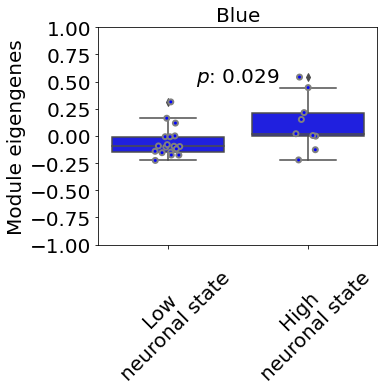

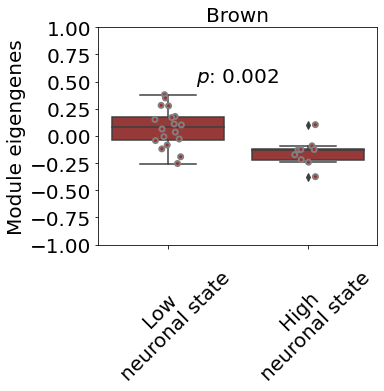

In [47]:
figsize=(5,4)

# for module in df_melt.Module.unique():
for module in ["MEblue", "MEbrown"]:
    color = module.split("ME")[1]
    if "grey60" in color:
        color="grey"

    df_melt_sub = df_melt[df_melt.Module==module]

    x, y = df_melt_sub[df_melt_sub.group=="low"].expression, \
            df_melt_sub[df_melt_sub.group=="high"].expression 
    pval = ttest_ind(x,y)[1] #mannwhitneyu(x,y)[1]


    # if color=="black":
    #     color="grey"

    # ax=sns.catplot(data=df_melt[df_melt.Module==module], col="Module", 
    #                   kind="box", x="group", y="expression",
    #                   color=color, order=hue_order, hue="group")
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=df_melt[df_melt.Module==module],
                      x="group", y="expression",
                      color=color, order=hue_order)
    sns.stripplot(data=df_melt[df_melt.Module==module],
                      x="group", y="expression",
                      color=color, order=hue_order, dodge=True, linewidth=2, edgecolor="grey", ax=ax)
    
    if pval <= 0.01:
        placement = "$\itp$: {}".format(str(round(pval,3)))
    elif pval <= 0.05 and pval >= 0.01:
        placement = "$\itp$: {}".format(str(round(pval,3)))
    elif pval > 0.05 and pval <= 0.1:
        placement = "$\itp$: {}".format(str(round(pval,3)))
    else:
        placement = ""
    plt.text(0.5, 0.5, placement, fontsize=20, ha="center")

    plt.ylabel("Module eigengenes", fontsize=20)
    plt.xlabel("", fontsize=0.1)
    plt.xticks(fontsize=20)
    ax.set_xticklabels(["Low\nneuronal state", "High\nneuronal state"], fontsize=20, rotation=45, ha="center", va="top")
    
    plt.yticks(np.arange(yl1, yl2, stepsize), fontsize=20)
    plt.ylim(-1,1)
    plt.title(module.split("ME")[1].capitalize(), fontsize=20)

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.legend([], [], frameon=False)
    
    # if "grey" not in module:
        # hub_genes = dict_hub_genes[module.split("ME")[-1]]
        # plt.text(1.5, 1.4, "Hub genes", fontsize=15)
        # plt.text(1.5, 1.2, "  ".join(hub_genes[0:4]), fontsize=12)
        # plt.text(1.5, 1, "  ".join(hub_genes[4:8]), fontsize=12)
        # plt.text(1.5, 0.8, "  ".join(hub_genes[8:12]), fontsize=12)

    plt.savefig("../results_figures/{}_violin.png".format(module.split("ME")[1].capitalize()), bbox_inches="tight")
    plt.savefig("../results_figures/{}_violin.pdf".format(module.split("ME")[1].capitalize()), bbox_inches="tight")
    
    plt.show()

In [23]:
modules = df_melt.Module.unique().tolist()

In [24]:
for module in modules:
    pd.DataFrame(index=dict_module_genes[module]).to_csv("../genesets/geneset_{}.csv".format(module))

# MEbrown

In [25]:
module = "MEbrown"

## q-value

In [26]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/panglaoDB_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["q-value"].tolist()

MEbrown


In [27]:
df_enr = df_enr[[module]]

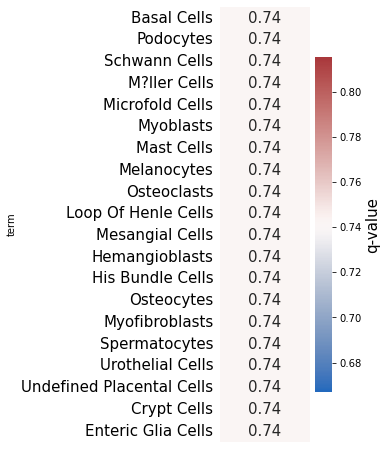

In [28]:
plt.figure(figsize=(2, 8))
ax = sns.heatmap(df_enr.astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'q-value'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/PangaloDB_heatmap_{}_qvalue.png".format(module), bbox_inches="tight")
plt.savefig("../results_figures/PangaloDB_heatmap_{}_qvalue.pdf".format(module), bbox_inches="tight")


## score

In [29]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/panglaoDB_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["zscore"].tolist()

MEbrown


In [30]:
df_enr = df_enr[[module]]

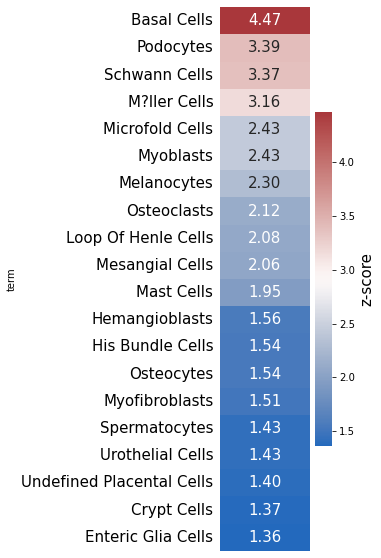

In [31]:
plt.figure(figsize=(2, 10))
ax = sns.heatmap(df_enr.sort_values(by=module, ascending=False).astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'z-score'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/PangaloDB_heatmap_{}_combined_zscore.png".format(module), bbox_inches="tight")
plt.savefig("../results_figures/PangaloDB_heatmap_{}_combined_zscore.pdf".format(module), bbox_inches="tight")

# MEblue

In [32]:
module = "MEblue"

In [33]:
tmp = pd.read_csv("../celltype_enr/panglaoDB_{}.txt".format(module), index_col=2)

In [34]:
tmp.index[0:10]

Index(['Neurons', 'Interneurons', 'Glycinergic Neurons', 'Trigeminal Neurons',
       'Oligodendrocyte Progenitor Cells', 'Oligodendrocytes',
       'Photoreceptor Cells', 'Chromaffin Cells', 'Purkinje Fiber Cells',
       'Enteric Neurons'],
      dtype='object', name='term')

## q-value

In [35]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/panglaoDB_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["q-value"].tolist()

MEblue


In [36]:
df_enr = df_enr[[module]]

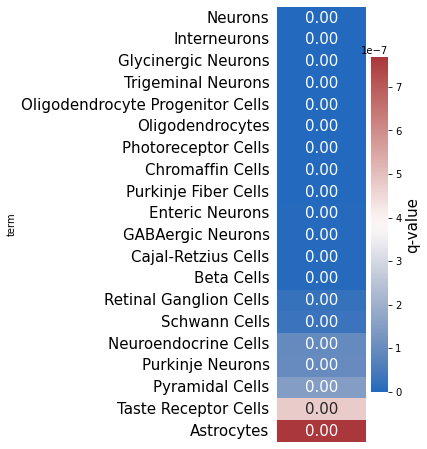

In [37]:
plt.figure(figsize=(2, 8))
ax = sns.heatmap(df_enr.astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'q-value'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/PangaloDB_heatmap_{}_qvalue.png".format(module), bbox_inches="tight")
plt.savefig("../results_figures/PangaloDB_heatmap_{}_qvalue.pdf".format(module), bbox_inches="tight")

## score

In [38]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/panglaoDB_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["zscore"].tolist()

MEblue


In [39]:
df_enr = df_enr[[module]]

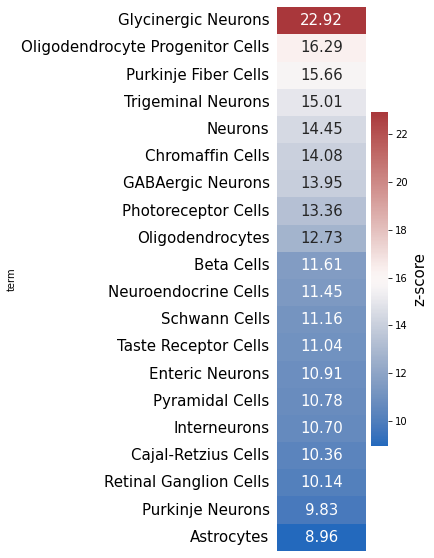

In [40]:
plt.figure(figsize=(2, 10))
ax = sns.heatmap(df_enr.sort_values(by=module, ascending=False).astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'z-score'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/PangaloDB_heatmap_{}_combined_zscore.png".format(module), bbox_inches="tight")
plt.savefig("../results_figures/PangaloDB_heatmap_{}_combined_zscore.pdf".format(module), bbox_inches="tight")

# Allen Brain 

# MEbrown

In [41]:
module = "MEbrown"

In [42]:
tmp = pd.read_csv("../celltype_enr/allenBrain10x_{}.txt".format(module), index_col=2)

In [43]:
tmp.index[0:10]

Index(['Mouse 31 Sncg up', 'Human Exc L3-5 RORB RPRM up', 'Mouse 379 PVM up',
       'Human Exc L3-5 FEZF2 LINC01107 up', 'Mouse 377 Micro up',
       'Mouse 358 Astro up', 'Human Oligo L5-6 OPALIN LDLRAP1 up',
       'Mouse 235 L3 RSP-ACA up', 'Human Inh L5-6 PVALB ZFPM2-AS1 up',
       'Mouse 30 Sncg up'],
      dtype='object', name='term')

## q-value

In [44]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/allenBrain10x_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["q-value"].tolist()

MEbrown


In [45]:
df_enr = df_enr[[module]]

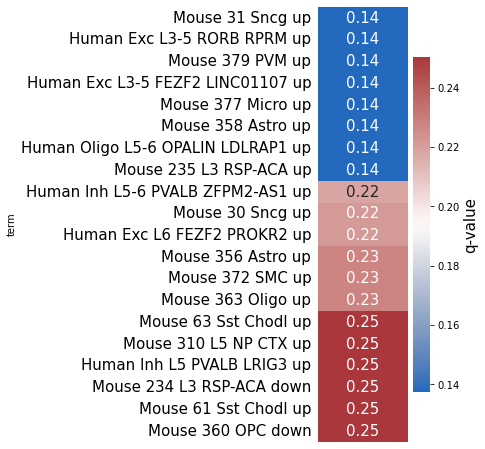

In [46]:
plt.figure(figsize=(2, 8))
ax = sns.heatmap(df_enr.astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'q-value'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/allenBrain10x_heatmap_{}_qvalue.png".format(module), bbox_inches="tight")
plt.savefig("../results_figures/allenBrain10x_heatmap_{}_qvalue.pdf".format(module), bbox_inches="tight")

## score

In [47]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/allenBrain10x_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["zscore"].tolist()

MEbrown


In [48]:
df_enr = df_enr[[module]]

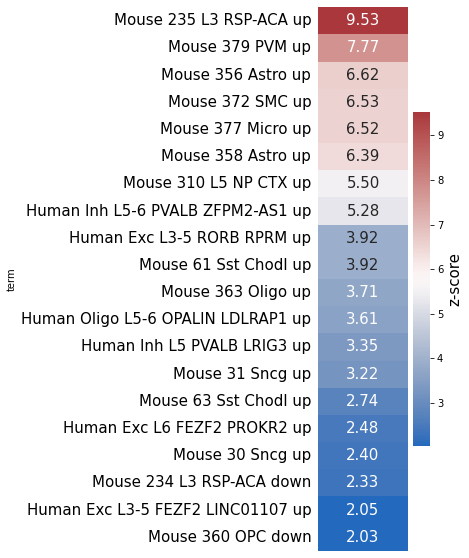

In [49]:
plt.figure(figsize=(2, 10))
ax = sns.heatmap(df_enr.sort_values(by=module, ascending=False).astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'z-score'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/allenBrain10x_heatmap_{}_combined_zscore.png".format(module), bbox_inches="tight")
plt.savefig("../results_figures/allenBrain10x_heatmap_{}_combined_zscore.pdf".format(module), bbox_inches="tight")

# MEblue

In [50]:
module = "MEblue"

In [51]:
tmp = pd.read_csv("../celltype_enr/allenBrain10x_{}.txt".format(module), index_col=2)

In [52]:
tmp.index[0:10]

Index(['Mouse 1 CR down', 'Mouse 364 Oligo down', 'Mouse 56 Vip down',
       'Mouse 365 Oligo down', 'Mouse 363 Oligo down', 'Mouse 57 Vip down',
       'Mouse 367 Oligo down', 'Mouse 125 DG down', 'Mouse 53 Vip down',
       'Mouse 355 V3d down'],
      dtype='object', name='term')

## q-value

In [53]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/allenBrain10x_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["q-value"].tolist()

MEblue


In [54]:
df_enr = df_enr[[module]]

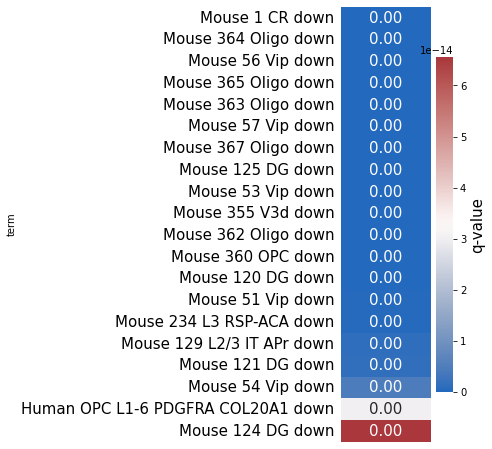

In [55]:
plt.figure(figsize=(2, 8))
ax = sns.heatmap(df_enr.astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'q-value'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/allenBrain10x_heatmap_{}_qvalue.png".format(module), bbox_inches="tight")

## score

In [56]:
# cell_type enchrichments
for module in [module]:
    print(module)
    tmp = pd.read_csv("../celltype_enr/allenBrain10x_{}.txt".format(module), index_col=2).iloc[0:20]
    cell_types = tmp.index
    df_enr = pd.DataFrame(index=cell_types, columns=[module])
    df_enr[module] = tmp["zscore"].tolist()

MEblue


In [57]:
df_enr = df_enr[[module]]

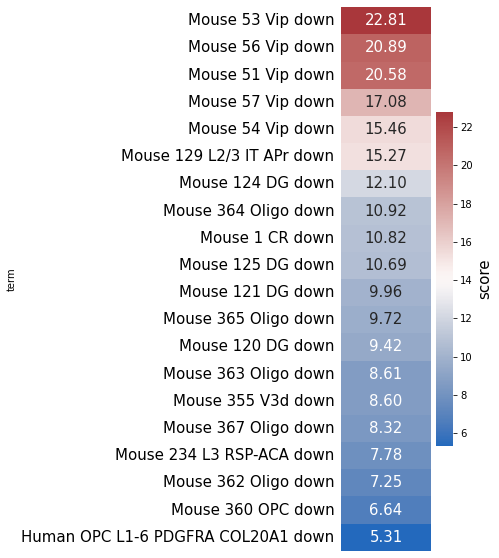

In [58]:
plt.figure(figsize=(2, 10))
ax = sns.heatmap(df_enr.sort_values(by=module, ascending=False).astype(float), annot=True, fmt=".2f", cbar_kws={'label': 'score'},
                annot_kws={"fontsize":15}, cmap="vlag")
plt.yticks(fontsize=15)
ax.tick_params(left=False, bottom=False) 
ax.set_xticklabels(labels="")
ax.figure.axes[-1].yaxis.label.set_size(15)

plt.yticks()

plt.savefig("../results_figures/allenBrain10x_heatmap_{}_combined_zscore.png".format(module), bbox_inches="tight")